In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from functools import partial
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train=pd.read_csv('../input/digit-recognizer/train.csv', sep=',',header=None).values
test=pd.read_csv('../input/digit-recognizer/test.csv', sep=',',header=None).values

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [3]:
train.shape

(42001, 785)

The trainning data comes in the form of a flattened array including the class, followed by the 28x28 pixles for the image.

In [4]:
train[0]

array(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4',
       'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10',
       'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16',
       'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22',
       'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28',
       'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34',
       'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40',
       'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46',
       'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52',
       'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58',
       'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64',
       'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70',
       'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76',
       'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', '

In [13]:
# seperating the label from the pixels
y_train = train[1:,0].astype(int) 
X_train = train[1:,1:].astype(int)/255
X_test = test[1:,:].astype(int)/255

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1)

In [6]:
X_train.shape

(37800, 28, 28, 1)

In [7]:
type(X_train[0][0])

numpy.ndarray

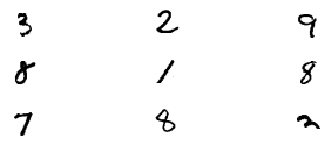

y values: [3 2 9 8 1 8 7 8 2]


In [8]:
X_sample = X_train[:9]
# Image representations of first 9 digits
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_sample):
    image = np.reshape(image, (28,28))
    plt.subplot(3, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Corrosponding y vals
print('y values:',y_train[:9])

In [9]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [10]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
DefaultPool = partial(keras.layers.MaxPooling2D,
                      pool_size=2)
DefaultDense = partial(keras.layers.Dense,
                       activation='relu')

In [11]:
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28,1]),
    DefaultPool(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    DefaultPool(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    DefaultPool(),
    keras.layers.Flatten(),
    DefaultDense(128),
    keras.layers.Dropout(0.5),  
    DefaultDense(64),
    keras.layers.Dropout(0.5),    
    keras.layers.Dense(10, activation='softmax'),
])

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum = 0.9, decay=1e-4),
              #optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics='accuracy')

In [16]:
# Create logs
root_logdir = os.path.join(os.curdir+'mnist_logs')
def get_run_log():
    import time
    run_id = time.strftime('run_%Y_%m_%d_%H_%M_%S')
    return os.path.join(root_logdir, run_id)
# Tensorboard 
runlog_dir = get_run_log()
tensorboard_cb = keras.callbacks.TensorBoard(runlog_dir)
# Save by step and introduce early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/checkpoint_model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=7,
                                                  restore_best_weights=True)
history = model.fit(datagen.flow(X_train,y_train, batch_size=32), epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/30
1182/1182 [==============================] - 14s 12ms/step - loss: 0.1341 - accuracy: 0.9678 - val_loss: 0.0540 - val_accuracy: 0.9876
Epoch 2/30
1182/1182 [==============================] - 14s 12ms/step - loss: 0.1049 - accuracy: 0.9746 - val_loss: 0.0940 - val_accuracy: 0.9779
Epoch 3/30
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0924 - accuracy: 0.9793 - val_loss: 0.0571 - val_accuracy: 0.9898
Epoch 4/30
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0761 - accuracy: 0.9824 - val_loss: 0.0510 - val_accuracy: 0.9902
Epoch 5/30
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0640 - accuracy: 0.9852 - val_loss: 0.0476 - val_accuracy: 0.9912
Epoch 6/30
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0550 - accuracy: 0.9873 - val_loss: 0.0430 - val_accuracy: 0.9912
Epoch 7/30
1182/1182 [==============================] - 15s 12ms/step - loss: 0.0524 - accuracy: 0.9883 - val_loss: 0.0439 -

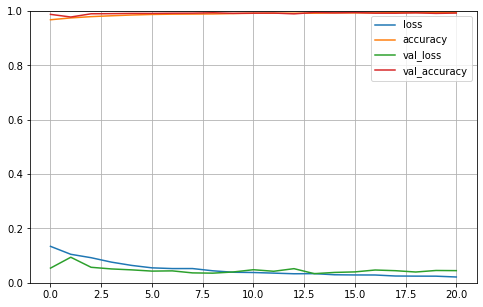

In [17]:
# Plot history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
preds = model.predict(X_test)

predict_class = np.argmax(preds, axis=1)
predict_class = predict_class.tolist()

In [19]:
idx = [i for i in range(1, len(predict_class)+1)]

In [20]:
data = {'ImageId': idx, 'Label':predict_class}

results = pd.DataFrame(data)
results.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [21]:
results.to_csv('Results.csv', index=False)